In [1]:
%matplotlib inline


# Iso-probability lines for Gaussian Processes classification (GPC)

A two-dimensional classification example showing iso-probability lines for
the predicted probabilities.


Automatically created module for IPython interactive environment
Learned kernel: 0.0256**2 * DotProduct(sigma_0=5.72) ** 2 


<ipython-input-2-de8e3b3e5794>:69: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(cax, ticks=[0., 0.2, 0.4, 0.6, 0.8, 1.], norm=norm)


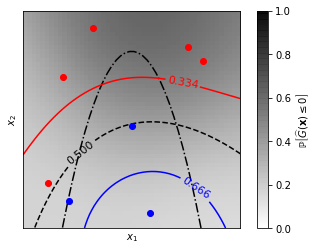

In [2]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
# Adapted to GaussianProcessClassifier:
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause

import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct, ConstantKernel as C

# A few constants
lim = 8


def g(x):
    """The function to predict (classification will then consist in predicting
    whether g(x) <= 0 or not)"""
    return 5. - x[:, 1] - .5 * x[:, 0] ** 2.

# Design of experiments
X = np.array([[-4.61611719, -6.00099547],
              [4.10469096, 5.32782448],
              [0.00000000, -0.50000000],
              [-6.17289014, -4.6984743],
              [1.3109306, -6.93271427],
              [-5.03823144, 3.10584743],
              [-2.87600388, 6.74310541],
              [5.21301203, 4.26386883]])

# Observations
y = np.array(g(X) > 0, dtype=int)

# Instantiate and fit Gaussian Process Model
kernel = C(0.1, (1e-5, np.inf)) * DotProduct(sigma_0=0.1) ** 2
gp = GaussianProcessClassifier(kernel=kernel)
gp.fit(X, y)
print("Learned kernel: %s " % gp.kernel_)

# Evaluate real function and the predicted probability
res = 50
x1, x2 = np.meshgrid(np.linspace(- lim, lim, res),
                     np.linspace(- lim, lim, res))
xx = np.vstack([x1.reshape(x1.size), x2.reshape(x2.size)]).T

y_true = g(xx)
y_prob = gp.predict_proba(xx)[:, 1]
y_true = y_true.reshape((res, res))
y_prob = y_prob.reshape((res, res))

# Plot the probabilistic classification iso-values
fig = plt.figure(1)
ax = fig.gca()
ax.axes.set_aspect('equal')
plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

cax = plt.imshow(y_prob, cmap=cm.gray_r, alpha=0.8,
                 extent=(-lim, lim, -lim, lim))
norm = plt.matplotlib.colors.Normalize(vmin=0., vmax=0.9)
cb = plt.colorbar(cax, ticks=[0., 0.2, 0.4, 0.6, 0.8, 1.], norm=norm)
cb.set_label(r'${\rm \mathbb{P}}\left[\widehat{G}(\mathbf{x}) \leq 0\right]$')
plt.clim(0, 1)

plt.plot(X[y <= 0, 0], X[y <= 0, 1], 'r.', markersize=12)

plt.plot(X[y > 0, 0], X[y > 0, 1], 'b.', markersize=12)

plt.contour(x1, x2, y_true, [0.], colors='k', linestyles='dashdot')

cs = plt.contour(x1, x2, y_prob, [0.666], colors='b',
                 linestyles='solid')
plt.clabel(cs, fontsize=11)

cs = plt.contour(x1, x2, y_prob, [0.5], colors='k',
                 linestyles='dashed')
plt.clabel(cs, fontsize=11)

cs = plt.contour(x1, x2, y_prob, [0.334], colors='r',
                 linestyles='solid')
plt.clabel(cs, fontsize=11)

plt.show()